In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DayLocator, HourLocator, DateFormatter, drange


In [23]:
base_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports'
list_links = []

for c in range(22, 32):
    list_links.append(str(base_url+'/01-{}-2020.csv'.format(c)))

for c in range(1, 30):
    if c <= 9:
        list_links.append(str(base_url+'/02-0{}-2020.csv'.format(c)))
    else:
        list_links.append(str(base_url+'/02-{}-2020.csv'.format(c)))

for c in range(1, 14):
    if c <= 9:
        list_links.append(str(base_url+'/03-0{}-2020.csv'.format(c)))
    else:
        list_links.append(str(base_url+'/03-{}-2020.csv'.format(c)))

In [24]:
list= []
for c in list_links:
    data = pd.read_csv(c)
    np.array(data)
    list.append(data)

In [31]:
list_links

['https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-22-2020.csv',
 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-23-2020.csv',
 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-24-2020.csv',
 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-25-2020.csv',
 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-26-2020.csv',
 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-27-2020.csv',
 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-28-2020.csv',
 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_da

In [25]:
for l in list:
    l['Last Update'] = l['Last Update'].astype('datetime64[D]')

In [26]:
data = pd.concat(list)

/home/sh1/jupyter_server/venv/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5383 entries, 0 to 229
Data columns (total 8 columns):
Confirmed         5364 non-null float64
Country/Region    5383 non-null object
Deaths            4942 non-null float64
Last Update       5383 non-null datetime64[ns]
Latitude          2565 non-null float64
Longitude         2565 non-null float64
Province/State    3342 non-null object
Recovered         4995 non-null float64
dtypes: datetime64[ns](1), float64(5), object(2)
memory usage: 378.5+ KB


In [8]:
data.head()

,Confirmed,Country/Region,Deaths,Last Update,Latitude,Longitude,Province/State,Recovered
0,1.0,Mainland China,NaN,2020-01-22,NaN,NaN,Anhui,NaN
1,14.0,Mainland China,NaN,2020-01-22,NaN,NaN,Beijing,NaN
2,6.0,Mainland China,NaN,2020-01-22,NaN,NaN,Chongqing,NaN
3,1.0,Mainland China,NaN,2020-01-22,NaN,NaN,Fujian,NaN
4,NaN,Mainland China,NaN,2020-01-22,NaN,NaN,Gansu,NaN


In [160]:
data.to_pickle('corona_data.pkl')

In [126]:
set(data["Country/Region"])

{' Azerbaijan',
 'Afghanistan',
 'Algeria',
 'Andorra',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahrain',
 'Belarus',
 'Belgium',
 'Brazil',
 'Cambodia',
 'Canada',
 'Chile',
 'Colombia',
 'Croatia',
 'Czech Republic',
 'Denmark',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'Estonia',
 'Finland',
 'France',
 'Georgia',
 'Germany',
 'Greece',
 'Hong Kong',
 'Iceland',
 'India',
 'Indonesia',
 'Iran',
 'Iraq',
 'Ireland',
 'Israel',
 'Italy',
 'Ivory Coast',
 'Japan',
 'Jordan',
 'Kuwait',
 'Latvia',
 'Lebanon',
 'Lithuania',
 'Luxembourg',
 'Macau',
 'Mainland China',
 'Malaysia',
 'Mexico',
 'Monaco',
 'Morocco',
 'Nepal',
 'Netherlands',
 'New Zealand',
 'Nigeria',
 'North Ireland',
 'North Macedonia',
 'Norway',
 'Oman',
 'Others',
 'Pakistan',
 'Philippines',
 'Portugal',
 'Qatar',
 'Romania',
 'Russia',
 'San Marino',
 'Saudi Arabia',
 'Senegal',
 'Singapore',
 'South Korea',
 'Spain',
 'Sri Lanka',
 'Sweden',
 'Switzerland',
 'Taiwan',
 'Thailand',
 

In [28]:
japan = data[data['Country/Region'] =='Japan']
china_hubei = data[(data['Country/Region'] =='Mainland China') &(data['Province/State'] =='Hubei') ]
iran = data[data['Country/Region'] =='Iran']
south_korea = data[data['Country/Region'] =='South Korea']
italy = data[data['Country/Region'] =='Italy']


In [11]:
def coronaplot(data, name):
    print(name)
    data_melt = pd.melt(data,id_vars=['Last Update','Country/Region','Province/State','Longitude', 'Latitude'], value_name='value',var_name='strain')

    fig, ax = plt.subplots()

    sns.pointplot(x="Last Update", y="value", hue='strain',data=data_melt, ax=ax)

    labels = ax.get_xticklabels() 
    plt.setp(labels, rotation=90);

Japan
China Hubei
South Korea
Iran
Italy


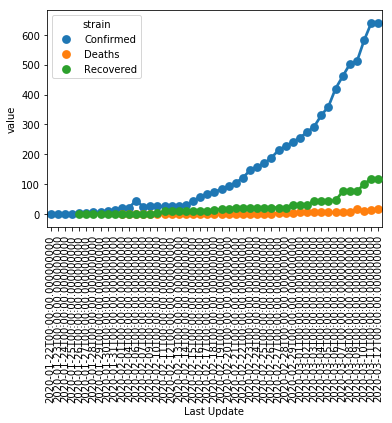

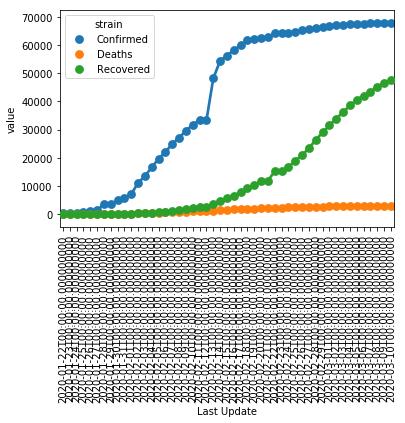

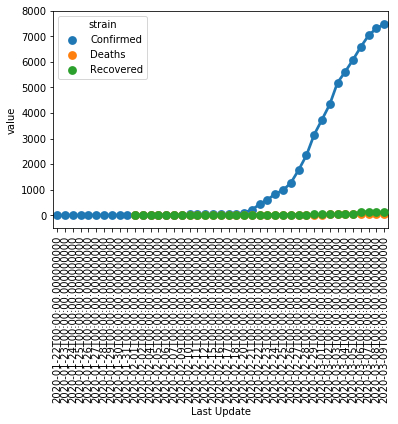

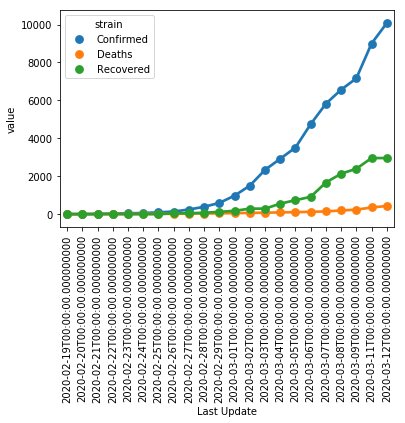

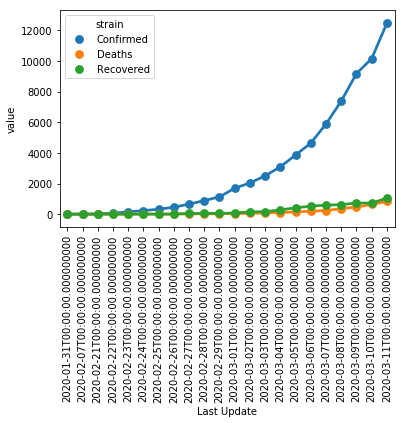

In [12]:
coronaplot(japan, 'Japan')
coronaplot(china_hubei, 'China Hubei')
coronaplot(south_korea, 'South Korea')
coronaplot(iran, 'Iran')
coronaplot(italy, 'Italy')



In [50]:
italy_march = data[(data['Country/Region'] =='Italy') & (data['Last Update'] >= '2020-03-01')]

italy march


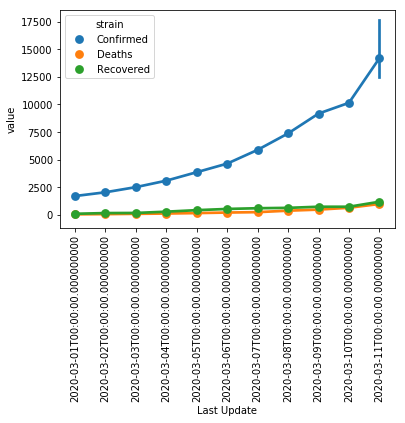

In [51]:
coronaplot(italy_march, 'italy march')

In [68]:
data[ ~ (data['Country/Region'].isin(['China', 'US'])) & ( data['Confirmed'] >50)& ( data['Last Update'] == '2020-03-12')].sort_values('Confirmed')

,Confirmed,Country/Region,Deaths,Last Update,Latitude,Longitude,Province/State,Recovered
71,52.0,Philippines,2.0,2020-03-12,12.8797,121.7740,NaN,2.0
70,52.0,Brazil,0.0,2020-03-12,-14.2350,-51.9253,NaN,0.0
67,61.0,Lebanon,3.0,2020-03-12,33.8547,35.8623,NaN,1.0
65,67.0,Egypt,1.0,2020-03-12,26.0000,30.0000,NaN,27.0
64,69.0,San Marino,3.0,2020-03-12,43.9424,12.4578,NaN,0.0
63,70.0,Thailand,1.0,2020-03-12,15.8700,100.9925,NaN,34.0
62,71.0,Iraq,8.0,2020-03-12,33.0000,44.0000,NaN,15.0
61,73.0,India,1.0,2020-03-12,21.0000,78.0000,NaN,4.0
57,80.0,Kuwait,0.0,2020-03-12,29.5000,47.7500,NaN,5.0
56,85.0,United Arab Emirates,0.0,2020-03-12,23.4241,53.8478,NaN,17.0


In [44]:
japan.loc[(japan['Last Update'] >= '2020-03-01')]


,Confirmed,Country/Region,Deaths,Last Update,Latitude,Longitude,Province/State,Recovered
20,256.0,Japan,6.0,2020-03-01,36.0000,138.0000,NaN,32.0
20,274.0,Japan,6.0,2020-03-02,36.0000,138.0000,NaN,32.0
20,293.0,Japan,6.0,2020-03-03,36.0000,138.0000,NaN,43.0
18,331.0,Japan,6.0,2020-03-04,36.0000,138.0000,NaN,43.0
19,360.0,Japan,6.0,2020-03-05,36.0000,138.0000,NaN,43.0
19,420.0,Japan,6.0,2020-03-06,36.0000,138.0000,NaN,46.0
19,461.0,Japan,6.0,2020-03-07,36.0000,138.0000,NaN,76.0
18,502.0,Japan,6.0,2020-03-08,36.0000,138.0000,NaN,76.0
18,511.0,Japan,17.0,2020-03-09,36.0000,138.0000,NaN,76.0
16,581.0,Japan,10.0,2020-03-10,36.0000,138.0000,NaN,101.0


In [36]:
japan.head()

,Confirmed,Country/Region,Deaths,Last Update,Latitude,Longitude,Province/State,Recovered
35,2.0,Japan,NaN,2020-01-22,NaN,NaN,NaN,NaN
35,1.0,Japan,NaN,2020-01-23,NaN,NaN,NaN,NaN
35,2.0,Japan,NaN,2020-01-24,NaN,NaN,NaN,NaN
35,2.0,Japan,NaN,2020-01-25,NaN,NaN,NaN,NaN
37,4.0,Japan,NaN,2020-01-26,NaN,NaN,NaN,1.0
